In [1]:
import numpy as np
from networkx import nx

import random
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power
import igraph as ig
import leidenalg as la
import cairo
from scipy.linalg import expm

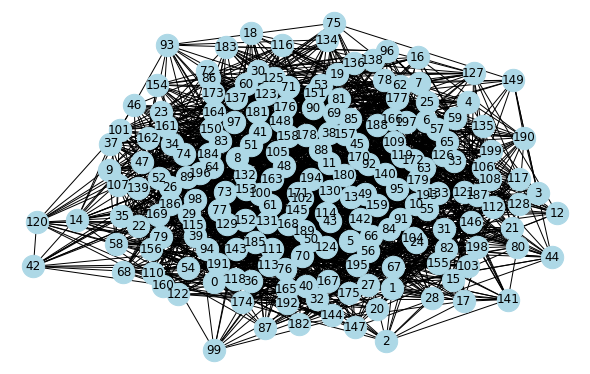

In [9]:


def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e, weight=random.choice([1,-1]))
    return G


from itertools import combinations, groupby
import networkx as nx
import random

nodes = 200
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)



plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [10]:
A=nx.to_numpy_matrix(G)
A3=matrix_power(A,3)
A_absolut_3=matrix_power(abs(A),3)
#print(A_absolut_3)

triangle_index=(np.trace(A3)+np.trace(A_absolut_3))/(2*np.trace(A_absolut_3))
print(triangle_index)



1.0


In [11]:
A=nx.to_numpy_matrix(G)
A_exp_trace=np.trace(expm(A))
A_abs_Exp_trace=np.trace(expm(abs(A)))
WBM=A_exp_trace/A_abs_Exp_trace #Walk-based measure


1.0


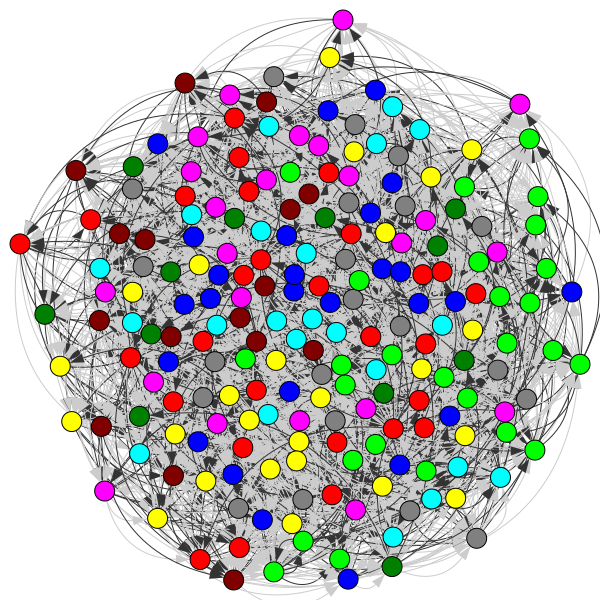

In [12]:
A=nx.to_numpy_matrix(G)
H= ig.Graph.Adjacency((abs(A) > 0).tolist())
partition =la.find_partition(H, la.ModularityVertexPartition)
ig.plot(partition)

